In [6]:
import numpy as np
from numpy import sin, cos, exp, sqrt
import matplotlib.pyplot as plt

# Reloading the module
import importlib

import Solid
importlib.reload(Solid)

import LinearSystem
importlib.reload(LinearSystem)

import Visualization
importlib.reload(Visualization)

import Utility
importlib.reload(Utility)

import Mesh
importlib.reload(Mesh)


<module 'Mesh' from 'C:\\Users\\bai_f\\Documents\\Timken\\research\\FEM\\3D Elasticity\\Mesh.py'>

In [7]:
solid = Solid.Solid('cylinder_external_load')
solid.set_ElasticProperty(E=1, nu=0.3)

In [8]:
func_u = np.empty(3, dtype=object)
func_f = np.empty(3, dtype=object)
func_p = np.empty(3, dtype=object)

func_u[0] = lambda x, y, z: x + 2*y + 3*z
func_u[1] = lambda x, y, z: 4*x + 5*y + 6*z
func_u[2] = lambda x, y, z: 7*x + 8*y + 9*z
func_f[0] = lambda x, y, z, G, l: 0
func_f[1] = lambda x, y, z, G, l: 0
func_f[2] = lambda x, y, z, G, l: 0
func_p[0] = lambda x, y, z, nx, ny, nz, G, l: 6*G*ny + 10*G*nz + nx*(2*G + 15*l)
func_p[1] = lambda x, y, z, nx, ny, nz, G, l: 6*G*nx + 14*G*nz + ny*(10*G + 15*l)
func_p[2] = lambda x, y, z, nx, ny, nz, G, l: 10*G*nx + 14*G*ny + nz*(18*G + 15*l)

import LinearSystem
importlib.reload(LinearSystem)
LHS, RHS = LinearSystem.set_LinearSystem(solid, func_u, func_f, func_p)
LinearSystem.solv_LinearSystem(LHS, RHS, solid)
LinearSystem.cal_Exact_Solution(solid, func_u)

residue 1.4921397450962104e-13


In [9]:
# Error analysis
print('Solution')
print('Max', np.max(solid.u))
print('Min', np.min(solid.u))

print('Exact')
print('Max', np.max(solid.u_exact))
print('Min', np.min(solid.u_exact))

print('Absolute error')
for a in range(3):
    print(f'in u{a}')
    print(np.max(np.abs(solid.u[a] - solid.u_exact[a])))

print('Relative error')
for a in range(3):
    print(f'in u{a}')
    print(np.max(np.abs(solid.u[a] - solid.u_exact[a])) / ( np.max(np.abs(solid.u_exact[a])) ) )

Solution
Max 28.62995546420936
Min -10.60660171940702
Exact
Max 28.62995546420936
Min -10.60660171940702
Absolute error
in u0
7.815970093361102e-14
in u1
1.4921397450962104e-13
in u2
2.4158453015843406e-13
Relative error
in u0
9.492789631080542e-15
in u1
8.111615967997338e-15
in u2
8.438173452991978e-15


Text(0.5, 1.0, 'u-uexact')

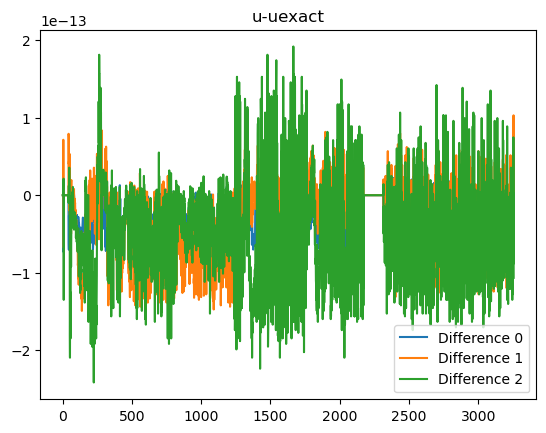

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)
for a in range(3):
    ax.plot(solid.u[a] - solid.u_exact[a], label=f'Difference {a}')
ax.legend()
ax.set_title('u-uexact')

import Mesh
importlib.reload(Mesh)
Mesh.output_VTK(solid, solid.name, exact=True)

## Test codes